# Diplomado en Inteligencia Artificial Aplicada

## Integrantes:
### Andres Alvarez Pineda
### Leonardo Alvarado Contreras

## Objetivo
Crear diferentes algoritmos de aprendizaje automático a un conjunto de datos de acciones de alguna empresa, y predecir el comportamiento del precio de estas con respecto al tiempo, aplicando métricas para evaluar y definir el mejor modelo.

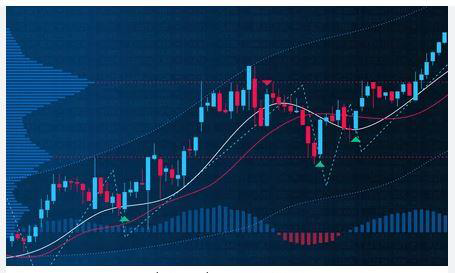

# Metodología
Se ha decidido utilizar un dataset de precios históricos intradia de la bolsa mexicana de valores, obtenida de la plataforma financiera Investing.
Los datos van desde enero del año 2020 hasta marzo del 2023.
Definido el origen del conjunto de datos, se hace un analisis explorarotorio de los datos, observando los valores de apertura, cierre, mínimos y máximos en cada día.
Evaluar los algoritmos y definir el que mejor se adapta al tipo de datos.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import plotly.graph_objects as go # visualization

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# carga del dataset a un data frame de pandas
df=pd.read_csv("/kaggle/input/time-series-bolsaa/Datos_histricos_BOLSAA_2020_2023 .csv")
df.rename_axis("Muestra", inplace=True)
df.sort_values(by="Muestra",ascending=False, inplace=True) # se ordenan los datos en orden ascendente en fecha
df.head()

,Fecha,Cierre,Apertura,Máximo,Mínimo,Vol.,% var.
Muestra,,,,,,,
824,02.01.2020,42.84,41.53,43.37,41.53,237.17K,3.63%
823,03.01.2020,41.94,42.74,42.74,41.44,401.38K,-2.10%
822,06.01.2020,41.68,42.04,42.34,41.52,535.09K,-0.62%
821,07.01.2020,42.04,41.71,42.34,41.60,439.53K,0.86%
820,08.01.2020,42.16,42.00,42.58,41.78,722.75K,0.29%


In [3]:
fig = go.Figure(data=[go.Scatter(x=df['Fecha'], y=df["Cierre"])]) # Visualización del cierre respecto al tiempo
fig.update_layout(
    title="Valor al cierre",
    xaxis_title="Fecha",
    yaxis_title="Cierre (Pesos)",
)
fig.show()

In [4]:

fig = go.Figure(data=[go.Scatter(x=df['Fecha'], y=df["Apertura"])]) # visualización de la apertura con respecto al tiempo
fig.update_layout(
    title="Valor al inicio del día",
    xaxis_title="Fecha",
    yaxis_title="Apertura (Pesos)",
)
fig.show()

In [5]:
fig = go.Figure(data=[go.Scatter(x=df['Fecha'], y=df["Máximo"])]) # Visualización del máximo alcanzado durante el día
fig.update_layout(
    title="Valor máximo durante el día",
    xaxis_title="Fecha",
    yaxis_title="Máximo (Pesos)",
)
fig.show()

In [6]:
fig = go.Figure(data=[go.Scatter(x=df['Fecha'], y=df["Mínimo"])]) #visualización del minimo respecto al tiempo
fig.update_layout(
    title="Valor mínimo durante el día",
    xaxis_title="Fecha",
    yaxis_title="Mínimo (Pesos)",
)
fig.show()

# comportamiento diario de la Acción de Enero de 2020 a Abril de 2023

In [7]:
# Grafico de velas que muestra la tendencia alcista o bajista durante cada día
fig = go.Figure(data=[go.Candlestick(x=df['Fecha'],
                open=df['Apertura'],
                high=df['Máximo'],
                low=df['Mínimo'],
                close=df['Cierre'])])

fig.update_layout(
    title="Gráfico de velas japonesas",
    xaxis_title="Fecha",
    yaxis_title="Valor de la acción (Pesos)",
)

fig.show()